In [14]:
import numpy as np

# 生成输入数据
x = np.random.uniform(-5, 5, 2000)

# 根据分段函数生成标签
def piecewise_function(x):
    if x < 0:
        return x**2 - 3*x + 2
    else:
        return np.sin(3*x)   #输入函数用了八百年

y = np.array([piecewise_function(xi) for xi in x])

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义神经网络模型
class PiecewiseNet(nn.Module):
    def __init__(self):
        super(PiecewiseNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 实例化模型
model = PiecewiseNet()

In [16]:
# 将数据转换为PyTorch张量
x_tensor = torch.tensor(x[:, np.newaxis], dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 划分训练集和测试集
train_size = int(0.7 * len(x_tensor))
x_train, x_test = x_tensor[:train_size], x_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train.unsqueeze(1))# 注意这里的unsqueeze(1) 在目标张量的末尾添加一个维度 不然会模型的输出和目标形状不一致 导致广播行为
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 232.93223571777344
Epoch 101, Loss: 5.265026569366455
Epoch 201, Loss: 0.9289090633392334
Epoch 301, Loss: 0.3877026438713074
Epoch 401, Loss: 0.2144494205713272
Epoch 501, Loss: 0.1642141044139862
Epoch 601, Loss: 0.13811394572257996
Epoch 701, Loss: 0.11885600537061691
Epoch 801, Loss: 0.10356035828590393
Epoch 901, Loss: 0.0870513916015625


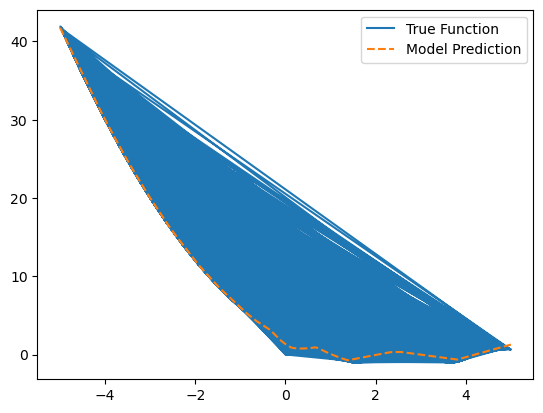

In [17]:
import matplotlib.pyplot as plt

# 在整个范围内评估模型
x_full = torch.linspace(-5, 5, 1000).unsqueeze(1)
y_pred = model(x_full).detach().numpy()

# 绘制真实函数和模型预测
plt.plot(x, y, label='True Function', linestyle='-')
plt.plot(x_full.numpy(), y_pred, label='Model Prediction', linestyle='--')
plt.legend()
plt.show()

Epoch 1, Loss: 223.13330078125
Epoch 101, Loss: 7.048218250274658
Epoch 201, Loss: 1.287735939025879
Epoch 301, Loss: 0.4665732681751251
Epoch 401, Loss: 0.25835344195365906
Epoch 501, Loss: 0.20805612206459045
Epoch 601, Loss: 0.188080832362175
Epoch 701, Loss: 0.17686325311660767
Epoch 801, Loss: 0.16708099842071533
Epoch 901, Loss: 0.15826120972633362


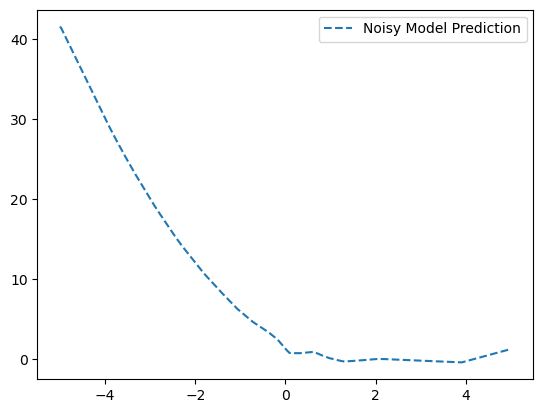

In [18]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

# x_train和y_train是numpy数组，首先将它们转换为Float类型的Tensor    大坑！！！！！！服了 弄了三天
x_train = x_train.clone().detach().to(torch.float32)  # 复制并转换为Float类型的Tensor
y_train = y_train.clone().detach().to(torch.float32)  # 复制并转换为Float类型的Tensor


# 添加噪声
noise = np.random.normal(0, 0.1, len(y_train))
y_train_noisy = y_train + torch.tensor(noise, dtype=torch.float32)  # 确保噪声也为Float类型

# 使用带噪声的数据重新训练模型
model = PiecewiseNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train_noisy.unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# 评估带噪声模型
y_pred_noisy = model(x_full).detach().numpy()
plt.plot(x_full.numpy(), y_pred_noisy, label='Noisy Model Prediction', linestyle='--')
plt.legend()
plt.show()
